In [1]:
import numpy as np
import analysis_functions_vicsek_new as fun
import matplotlib.pyplot as plt
import time
import scipy.stats as sps
import os
import freud
import analysis_functions_vicsek_new as fun
from matplotlib import cm, colors
import random


In [2]:

mode = "G"
nPart = 10000
phi = 1.0
noise = "0.20"
Rp = 1.0
K = "0.0_8.0"
xTy = 1.0
seed = 1

L = np.sqrt(nPart / (phi*xTy))
Ly = L
Lx = L*xTy
inparFile, posFile = fun.get_files(mode=mode, nPart=nPart, phi=phi, noise=noise, K=K, Rp=Rp, xTy=xTy, seed=seed)
posFileExact = fun.get_file_path(mode=mode, nPart=nPart, phi=phi, noise=noise, K=K, Rp=Rp, xTy=xTy, seed=seed, file_name="pos_exact")

# posFileExact = '/Users/el2021/Code/2D_ActiveSpinGlass_EL/simulation_data/Gaussian/N10000/phi1.0_n0.20/K0.0_8.0/Rp1.0/xTy1.0/s1/pos_exact'
x, y, theta, view_time = fun.get_pos_ex_snapshot(posFileExact)


In [ ]:
# norm = colors.Normalize(vmin=0.0, vmax=np.max(num_nei), clip=True)
# mapper = cm.ScalarMappable(norm=norm, cmap=cm.plasma)
# cols = mapper.to_rgba(num_nei)

# cols = [cols[i] for i in indices]

# fig, ax = plt.subplots(figsize=(10*xTy,10), dpi=72)
# # ax.scatter(x_c, y_c, s=0.1)
# ax.quiver(x_c, y_c, u, v, color=cols)
# ax.set_xlim(0,Lx)
# ax.set_ylim(0,Ly)
# plt.show()

In [3]:
indices = []
x_c = []
y_c = []
p_c = []

for i in range(nPart):
    xw = fun.pbc_wrap(x[i], L)
    yw = fun.pbc_wrap(y[i], L)
    if xw < 42 and xw>38:
        if yw< 70 and yw>68:
            indices.append(i)
            x_c.append(xw)
            y_c.append(yw)
            p_c.append(theta[i])

u = np.cos(p_c)
v = np.sin(p_c)

num_nei = fun.neighbour_counts(mode, nPart, phi, noise, K, Rp, xTy, seed, r_max=1)


In [4]:
print(indices)
print(len(indices))

[500, 838, 1000, 1094, 1111, 1216, 1307, 1381, 1395, 1408, 1550, 1555, 1782, 1800, 1942, 1976, 2074, 2156, 2476, 2852, 3470, 3479, 3977, 4289, 4552, 4701, 4762, 5217, 5339, 5638, 6052, 6421, 7178, 7363, 7436, 7593, 8061, 8069, 8194, 8309, 8312, 8751, 8907, 9137]
44


In [5]:

sim_dir = fun.get_sim_dir(mode=mode, nPart=nPart, phi=phi, noise=noise, K=K, Rp=Rp, xTy=xTy, seed=seed)
couplingFile = os.path.join(sim_dir, "coupling")


with open(couplingFile) as f:
    num = len(indices)
    # K_matrix = np.zeros((num, num))
    K_list = []
    K_all = []
    line = 0
    i = 0
    j = i+1
    k = nPart-1
    start_row = 0
    K_list = []
    for Kij in f:
        if i in indices and j in indices:
            # K_matrix[indices.index(i)][indices.index(j)] = float(Kij)
            K_list.append(float(Kij))
        K_all.append(float(Kij))
        line += 1
        if line == start_row + k:
            i += 1
            j = i+1
            k -= 1
            start_row = line
        else:
            j += 1



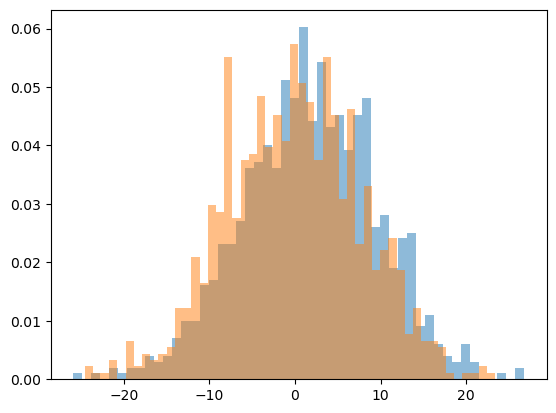

In [17]:
plt.hist(K_list, bins=50, alpha=0.5, density=True)
K_random = random.sample(K_all, len(K_list))
plt.hist(K_random, bins=50, alpha=0.5, density=True)
plt.show()




In [1]:
import numpy as np
import analysis_functions_vicsek_new as fun
import matplotlib.pyplot as plt



mode = "G"
nPart = 10000
phi = 1.0
noise = "0.20"
K = "0.0_8.0"
Rp = 1.0
xTy = 1.0
seed = 1
r_max = 1
tape_time = 1


# fun.write_contacts(mode=mode, nPart=nPart, phi=phi, noise=noise, K=K, Rp=Rp, xTy=xTy, seed=seed, r_max=r_max, tape_time=tape_time)

# fun.plot_contacts(mode=mode, nPart=nPart, phi=phi, noise=noise, K=K, Rp=Rp, xTy=xTy, seed=seed, r_max=r_max)

# fun.plot_K_vs_contact_time(mode, nPart, phi, noise, K, Rp, xTy, seed, r_max, log_x=True, log_y=True)

In [2]:
fun.get_sim_dir(mode, nPart, phi, noise, K, Rp, xTy, seed)

'/Users/el2021/Code/2D_ActiveSpinGlass_EL/simulation_data/Gaussian/N10000/phi1.0_n0.20/K0.0_8.0/Rp1.0/xTy1.0/s1'

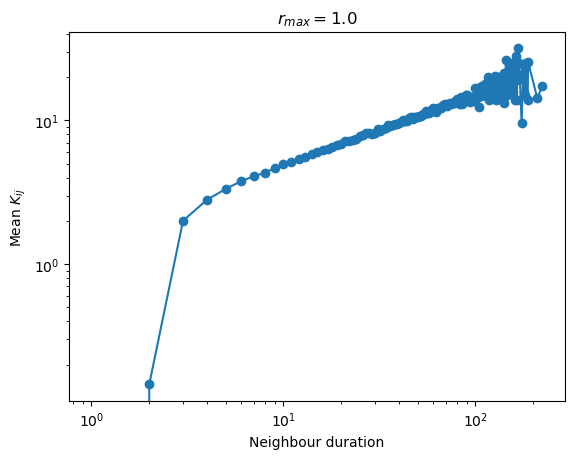

In [3]:

ix, jx, contact_duration, r_max, tape_time = fun.read_contacts(mode, nPart, phi, noise, K, Rp, xTy, seed, r_max)

Kij = fun.get_couplings(mode, nPart, phi, noise, K, Rp, xTy, seed)

K_t = []

for t in np.unique(contact_duration):
    contact_t = [i for i,v in enumerate(contact_duration) if v==t]
    ixs = [int(ix[k]) for k in contact_t]
    jxs = [int(jx[k]) for k in contact_t]

    K_contact = []
    for i,j in zip(ixs,jxs):
        index = int((nPart*(nPart-1)/2) - (nPart-i)*((nPart-i)-1)/2 + j - i - 1)
        K_contact.append(Kij[index])


    K_t.append(np.mean(K_contact))

fig, ax = plt.subplots()

ax.plot(np.unique(contact_duration), K_t, '-o')
# ax.plot(np.unique(contact_duration), 1/5*np.unique(contact_duration), '--')
ax.set_title(r"$r_{max}=$" + str(r_max))
ax.set_xlabel("Neighbour duration")
ax.set_ylabel(r"Mean $K_{ij}$")

ax.set_xscale("log")
ax.set_yscale("log")

plt.show()

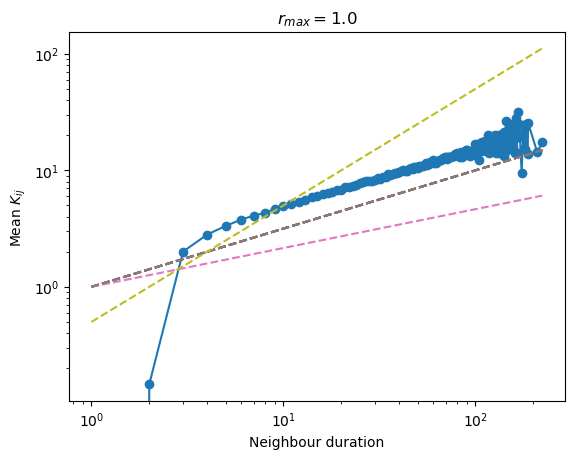

In [10]:
fig2, ax2 = fig, ax
ax2.plot(np.unique(contact_duration), np.unique(contact_duration)**(1/2), '--')
ax2.plot(np.unique(contact_duration), np.unique(contact_duration)/2, '--')
fig2